# WG8 - Grupo 2

In [44]:
#El primer paso es importar las librerías que nos serán de utilidad a posteriori
import pandas as pd
import altair as alt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install rdata #también debemos instalar rdata, que nos permite abrir archivos en formato RData











Note: you may need to restart the kernel to use updated packages.


In [46]:
import rdata #esta última librería nos permite abrir archivos en formato RData

In [47]:
parsed = rdata.parser.parse_file(rdata.TESTDATA_PATH / r"C:\Users\DELL\Documents\GitHub\1ECO35_2022_2\data\wage2015_subsample_inference.RData")
converted = rdata.conversion.convert(parsed, default_encoding="utf8")

In [48]:
converted

{'data':             wage     lwage  sex  shs  hsg  scl  clg   ad   mw   so   we   ne  \
 10      9.615385  2.263364  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
 12     48.076923  3.872802  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
 15     11.057692  2.403126  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
 18     13.942308  2.634928  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
 19     28.846154  3.361977  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
 ...          ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 32620  14.769231  2.692546  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
 32624  23.076923  3.138833  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
 32626  38.461538  3.649659  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 32631  32.967033  3.495508  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
 32643  17.307692  2.851151  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 
        exp1  exp2

In [49]:
print(converted.keys()) # Notamos que converted no es aún un dataframe, sino un diccionario
print(type(converted))

dict_keys(['data'])

<class 'dict'>


In [50]:
dfwage = pd.DataFrame(converted.get("data"))

In [51]:
dfwage

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6
32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,2920,9,6570,11


Características sociodemográficas y de mercado laboral
* wage: salario por hora.
* lwage: salario por hora en logaritmo.
* sex: dummy que toma el valor de 1 si la persona es mujer
* exp1: años de experiencia laboral
* exp2: años de experiencia laboral al cuadrado
* exp3: años de experiencia laboral al cubo
* exp4: años de experiencia laboral a la cuarta

Niveles educativos
* shs: Si la persona tiene secundaria incompleta (Some high school)
* shg: secundaria completa (High schoool graduate)
* scl: Universitaria incompleta (Some college)
* clg: Universitaria completa (College gratuate)
* ad: Grado educativo avanzado (Advanced degree - master or Phd)

1. En gráfico muestre el histograma de frecuencias absolutas del salario y , en otro gráfico, el histograma del logaritmo del salario. Comente las diferencias y por qué.

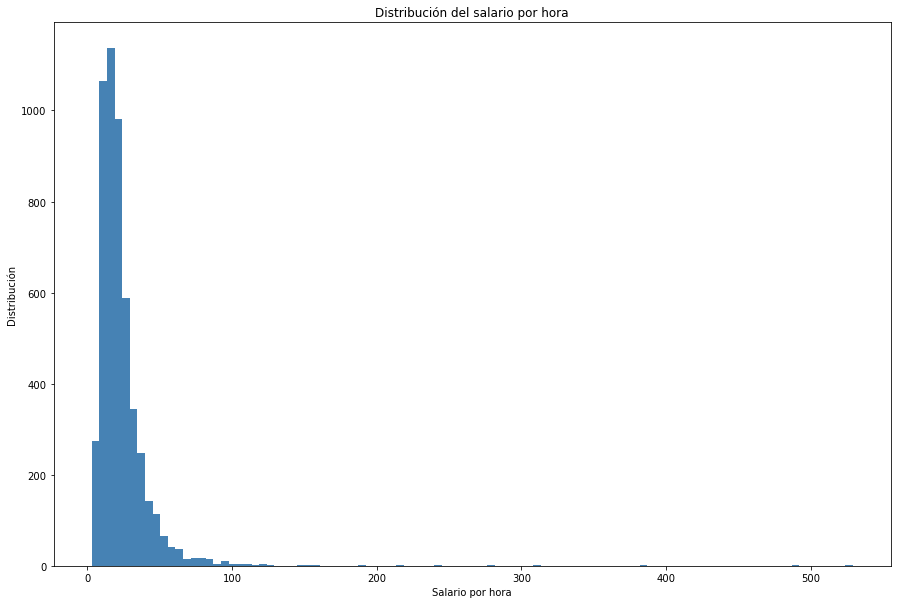

In [55]:
#Histograma del salario
fig, ax = plt.subplots( figsize=(15,10) ) # objeto figura y definimos el tamaño de visualizaciòn

dfwage['wage'].plot(kind = 'hist', bins = 100, color='steelblue') # kind= hist es un histograma de frecuencias absolutas
plt.title('Distribución del salario por hora') #Título del gráfico
plt.xlabel('Salario por hora') #Titulo eje x
plt.ylabel('Distribución') #Titulo eje y

plt.show()

Text(0, 0.5, 'Densidad')

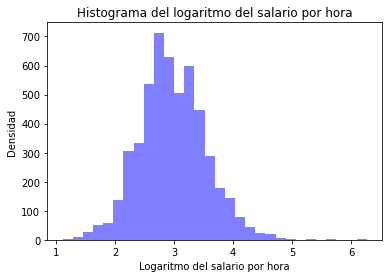

In [53]:
#Histograma del logaritmo del salario por hora
plt.hist(dfwage.lwage, bins=30,  alpha=0.5,#variable del grafico, numero de barras y parámetro
         histtype='stepfilled', color='blue',#definimos tipo de grafico y color 
         edgecolor='none');#color del borde de las barras
plt.title('Histograma del logaritmo del salario por hora') #Titulo
plt.xlabel('Logaritmo del salario por hora') #Titulo eje x
plt.ylabel('Densidad') #Titulo eje x

Entonces, como se puede apreciar en los gráficos la distribución del salario difiere en valor absoluto y logaritmo. Primero, al analizar el histograma en valor absoluto, se encuentran valores desde el 0 hasta el 600 aproximadamente y concentrados entre los valores de 0 y 100 unidades. Por otro lado, al usar logaritmos el rango de nuestra variable se acorta y se encuentran valores entre el 1 y el 7 aproximadamente, y los valores se concentran entre el 1 el 5, ya que estos representan los logaritmos de los valores de salario entre el 0 y 100 unidades. Asimismo, la distrbución del salario por hora es asimetrica postivia, pero al acotarlo con el logaritmo la distribución se asimila más a una normal. Por ello, al realizar estimaciones o investigaciones con salario, se utiliza logaritmos ya que permite acotar el rango donde se distribuye y no tener datos tan dispersos que aumentan la varianza e influyen en los resultados.

2. En una sola imagen, el gráfico de densidad del logaritmo del salario por hora de las mujeres que terminaron la universidad y el caso de los hombres.

Para abordar esta tarea podemos generar filtros de la base de datos. La variable sex nos permite diferencias entre hombres y mujeres. Los dos grupso de interés son: (1) Mujeres con universidad completa; (2) hombres en general. Hay que notar que dichos grupos no son colectivamente exhaustivos. Por ello, debemos tener cuidado al momento de elegir las categorías que serán graficadas.

In [148]:
cond_mu = dfwage['sex']==1 #condicón para que las observaciones sean mujer
cond_h = dfwage['sex']==0 #condicón para que las observaciones sean hombre
cond_uni = dfwage['clg']==1 #condicón para que las observaciones hayan terminado la universidad

In [147]:
dfwage[cond_mu & cond_uni] #de esta forma podemos quedarnos con una base de datos que sólo considere a las mujeres graduadas de universidad

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
71,19.230769,2.956512,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18
96,16.346154,2.793993,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,110,1,7870,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32504,18.750000,2.931194,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.04,0.008,0.0016,2000,6,8370,18
32567,48.076923,3.872802,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,25.0,6.25,15.625,39.0625,3255,10,8170,18
32581,26.442308,3.274965,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,34.0,11.56,39.304,133.6336,2310,8,7860,17
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.25,0.125,0.0625,3255,10,8190,18


In [ ]:
# Se filtra las personas que terminaron la universidad 

df_univ = df[df.clg.isin([1])|df.ad.isin([1])]

df_univ = df_univ[["lwage", "sex"]]
df_h_m=pd.DataFrame()

# Se agrega por hombre y mujere; además se renombra las columnas
df_h_m = df_univ.pivot(columns='sex',values='lwage')
df_h_m.columns =['mujer','hombre']

import matplotlib.pyplot as plt 

# Se procede a graficar la distribución del logaritmo del salario (lwage) por sexo
df_h_m.plot.density(figsize = (7, 7), linewidth = 4) 
  
plt.xlabel("lwage by sex")

Text(0.5, 0, 'lwage by sex')

In [150]:
dfwage[cond_mu & cond_uni |cond_h ]  #Análogamente, podemos trabajar con una base de datos que considere a las mujeres si y solo si han terminado la universidad y a los hombres en general
# es decir a: (las observaciones que son mujeres Y tienen universidad completa) O (Las observaciones que son hombres)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32619,13.846154,2.628007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,800,2,770,4
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6
32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,2920,9,6570,11


<AxesSubplot: ylabel='Density'>

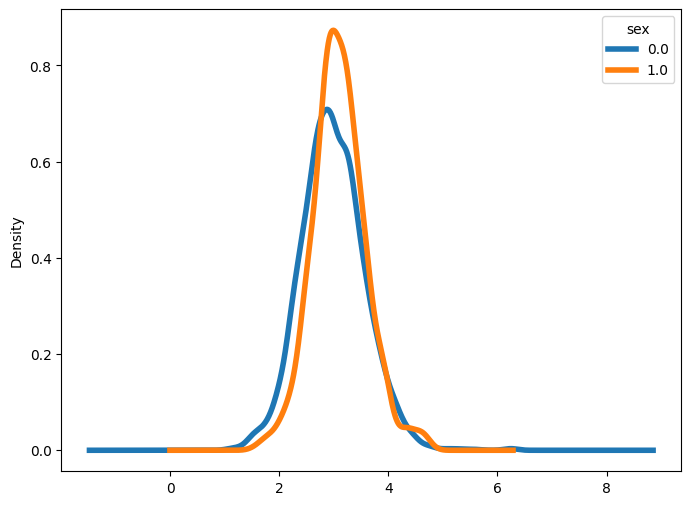

In [153]:
data_wide = dfwage[cond_mu & cond_uni |cond_h].pivot(columns = 'sex',
                     values = 'lwage')
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4)

<AxesSubplot: xlabel='lwage', ylabel='Density'>

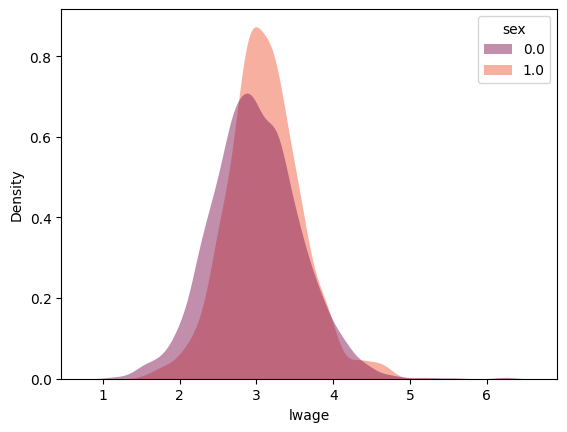

In [158]:
sns.kdeplot(
   data=dfwage[cond_mu & cond_uni |cond_h], x="lwage", hue="sex",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)

In [163]:
dfwage[cond_mu & cond_uni |cond_h][["lwage"]]

,lwage
10,2.263364
12,3.872802
15,2.403126
19,3.361977
30,2.462215
...,...
32619,2.628007
32620,2.692546
32626,3.649659
32631,3.495508


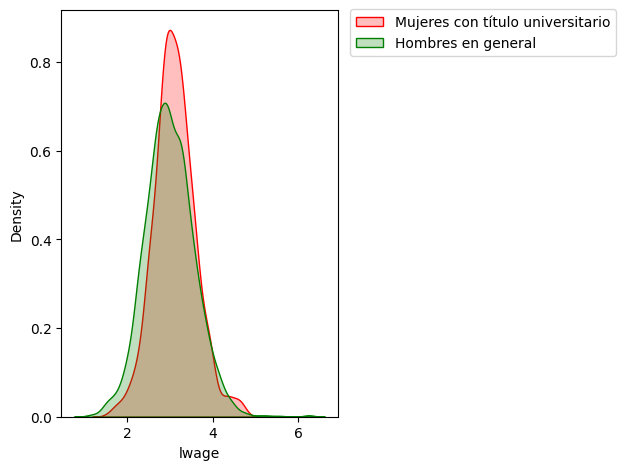

In [165]:
fig, ax = plt.subplots()
sns.kdeplot(data=dfwage[cond_mu & cond_uni][["lwage"]].squeeze(), ax=ax, color='red', fill=True, label='Mujeres con título universitario')
sns.kdeplot(data=dfwage[cond_h][["lwage"]].squeeze(), ax=ax, color='green', fill=True, label='Hombres en general')

ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

3. En un gráfico Pie, muestre el porcentaje de personas según nivel educativo.

Niveles educativos

* shs: Si la persona tiene secundaria incompleta (Some high school)
* shg: secundaria completa (High schoool graduate)
* scl: Universitaria incompleta (Some college)
* clg: Universitaria completa (College gratuate)
* ad: Grado educativo avanzado (Advanced degree - master or Phd)

In [166]:
dfwage.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100


In [189]:
#Agregamos las etiquetas para nuestro grafico pie y conocer los montos totales de nuestras variables
#Las variables que utilizamos son las siguientes:
print("Número de personas con secundaria incompleta: ", sum(dfwage.shs > 0),"|||||||| ",
      "Número de personas con secundaria completa: ", sum(dfwage.hsg > 0), " ||||||||",
      "Número de personas con universitaria incompleta: ", sum(dfwage.scl > 0), "||||||||",
      "Número de personas con universitaria completa: ", sum(dfwage.clg > 0), "||||||||",
      "Número de personas con universitaria completa: ", sum(dfwage.ad > 0))

Número de personas con secundaria incompleta:  120 ||||||||  Número de personas con secundaria completa:  1256  |||||||| Número de personas con universitaria incompleta:  1432 |||||||| Número de personas con universitaria completa:  1636 |||||||| Número de personas con universitaria completa:  706


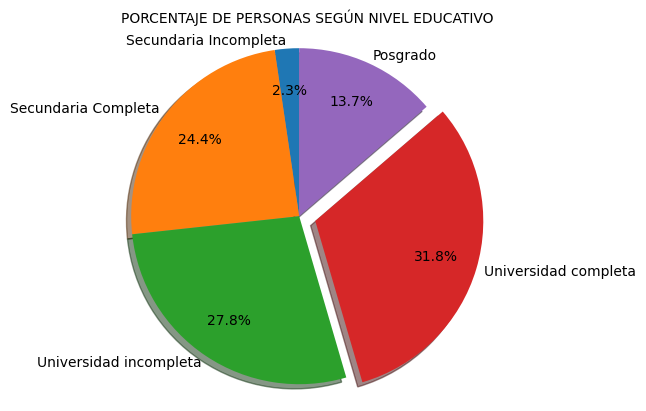

In [204]:
#Identificamos nuestra data 
data = [120, 1256, 1432, 1636, 706]

#Identificamos las etiquetas de nuestro grafico pie
label = ['Secundaria Incompleta', 'Secundaria Completa', 'Universidad incompleta', 'Universidad completa', 'Posgrado']

#Por último, utilizamos la variable "plt.pie" para crear nuestro grafico pie
plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0,0,0.1,0], shadow=True, startangle=90, pctdistance=0.75, labeldistance=1.05)
plt.title('PORCENTAJE DE PERSONAS SEGÚN NIVEL EDUCATIVO', fontsize=10)
plt.axis('equal')
plt.show()

4. En un gráfico, muestre el diagrama de cajas (box - plot) del logaritmo del salario por hora de las personas con el mayor nivel educativo (ad) según genero. Nótese que el gráfico debe contener dos box-plot uno para los hombres y otro para las mujeres.

In [206]:
import altair as alt

In [207]:
cond_ad = dfwage['ad']==1 #condicón para que las observaciones sean del más alto nivel educativo

In [219]:
dfwage['Sexo'] = 'Mujer'
dfwage.loc[(dfwage['sex'] < 1), 'Sexo']  = 'Hombre'

In [220]:
dfwage

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,Sexo
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18,Mujer
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9,Hombre
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4,Hombre
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12,Mujer
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22,Mujer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9,Hombre
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20,Mujer
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6,Hombre
32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,1.0,1.0,1.0,2920,9,6570,11,Hombre


<AxesSubplot: xlabel='Sexo', ylabel='wage'>

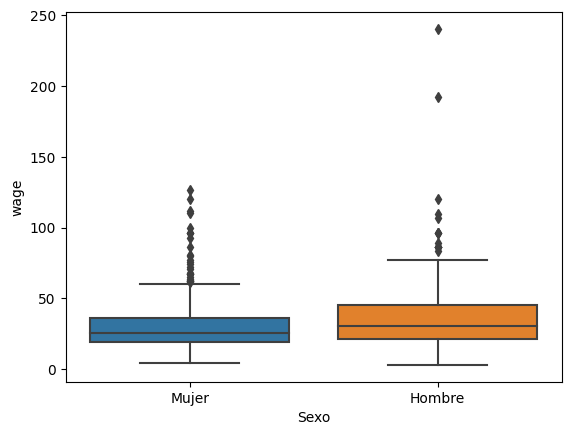

In [221]:
sns.boxplot(data=dfwage[cond_ad], x="Sexo", y="wage")

In [223]:
alt.Chart(dfwage[cond_ad]).mark_boxplot(size=100, extent=0.5).encode(
    x='Sexo:O',
    y=alt.Y('lwage:Q',scale=alt.Scale(zero=False)),
    color=alt.Color('Sexo')
).properties(width=300)

alt.Chart(...)